In [31]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix

## Question 1

In [32]:
# Load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [33]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Add fully connected layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Display the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

In [ ]:
model.compile(optimizer='adam',
 loss='categorical_crossentropy',
 metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 44s 57ms/step - loss: 0.2108 - accuracy: 0.9376 - val_loss: 0.0744 - val_accuracy: 0.9776
Epoch 2/10
750/750 [==============================] - 44s 58ms/step - loss: 0.0543 - accuracy: 0.9825 - val_loss: 0.0642 - val_accuracy: 0.9810
Epoch 3/10
750/750 [==============================] - 42s 55ms/step - loss: 0.0397 - accuracy: 0.9875 - val_loss: 0.0462 - val_accuracy: 0.9856
Epoch 4/10
750/750 [==============================] - 41s 55ms/step - loss: 0.0301 - accuracy: 0.9902 - val_loss: 0.0369 - val_accuracy: 0.9893
Epoch 5/10
750/750 [==============================] - 41s 55ms/step - loss: 0.0241 - accuracy: 0.9926 - val_loss: 0.0357 - val_accuracy: 0.9894
Epoch 6/10
750/750 [==============================] - 41s 54ms/step - loss: 0.0202 - accuracy: 0.9933 - val_loss: 0.0504 - val_accuracy: 0.9847
Epoch 7/10
750/750 [==============================] - 43s 57ms/step - loss: 0.0168 - accuracy: 0.9943 - val_loss: 0.0505 - val_accuracy:

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 3s 9ms/step - loss: 0.0335 - accuracy: 0.9902
Test accuracy: 0.9901999831199646


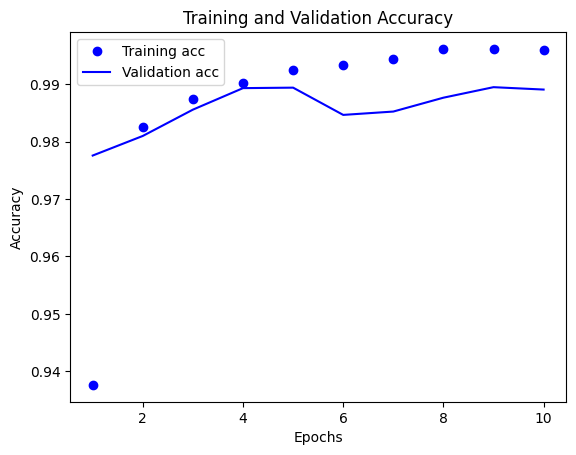

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Question 1


Epoch 1/10
86/86 [==============================] - 8s 90ms/step - loss: 0.0192 - accuracy: 0.9949 - val_loss: 0.0292 - val_accuracy: 0.9921
Epoch 2/10
86/86 [==============================] - 6s 75ms/step - loss: 0.0047 - accuracy: 0.9985 - val_loss: 0.0267 - val_accuracy: 0.9932
Epoch 3/10
86/86 [==============================] - 7s 88ms/step - loss: 0.0018 - accuracy: 0.9996 - val_loss: 0.0258 - val_accuracy: 0.9933
Epoch 4/10
86/86 [==============================] - 6s 75ms/step - loss: 7.2728e-04 - accuracy: 0.9998 - val_loss: 0.0273 - val_accuracy: 0.9930
Epoch 5/10
86/86 [==============================] - 7s 82ms/step - loss: 1.9225e-04 - accuracy: 1.0000 - val_loss: 0.0278 - val_accuracy: 0.9931
Epoch 6/10
86/86 [==============================] - 9s 108ms/step - loss: 1.1195e-04 - accuracy: 1.0000 - val_loss: 0.0282 - val_accuracy: 0.9930
Epoch 7/10
86/86 [==============================] - 6s 70ms/step - loss: 8.9432e-05 - accuracy: 1.0000 - val_loss: 0.0284 - val_accuracy: 0.9

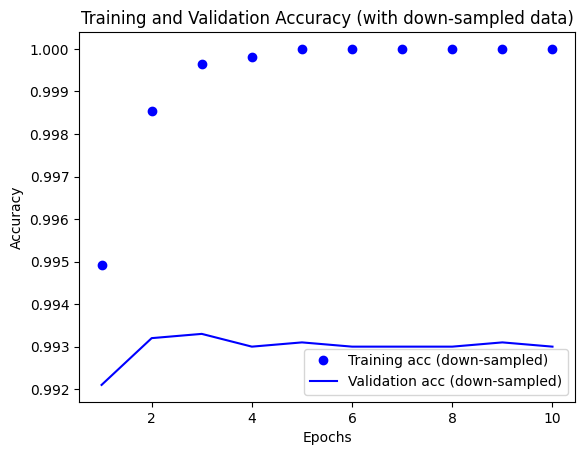

In [ ]:
# Down-sample the training data
import numpy as np

downsampled_train_images = []
downsampled_train_labels = []

for digit in range(10):
    digit_indices = np.where(np.argmax(train_labels, axis=1) == digit)[0]
    selected_indices = np.random.choice(digit_indices, size=(digit+1)*100, replace=False)
    downsampled_train_images.extend(train_images[selected_indices])
    downsampled_train_labels.extend(train_labels[selected_indices])

downsampled_train_images = np.array(downsampled_train_images)
downsampled_train_labels = np.array(downsampled_train_labels)

# Train the model using down-sampled data
history_downsampled = model.fit(
    downsampled_train_images,
    downsampled_train_labels,
    epochs=10,
    batch_size=64,
    validation_data=(test_images, test_labels)
)

# Evaluate the model on the provided test set
test_loss_downsampled, test_acc_downsampled = model.evaluate(test_images, test_labels)
print(f'Test accuracy (with down-sampled data): {test_acc_downsampled}')

# Plot training and validation accuracy
acc_downsampled = history_downsampled.history['accuracy']
val_acc_downsampled = history_downsampled.history['val_accuracy']

plt.plot(epochs, acc_downsampled, 'bo', label='Training acc (down-sampled)')
plt.plot(epochs, val_acc_downsampled, 'b', label='Validation acc (down-sampled)')
plt.title('Training and Validation Accuracy (with down-sampled data)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
test_pred = model.predict(test_images).argmax(axis=1)
confusion_matrix(test_labels.argmax(axis=1), test_pred)

313/313 [==============================] - 4s 12ms/step


array([[ 971,    0,    0,    0,    4,    0,    2,    2,    1,    0],
       [   0, 1132,    1,    1,    0,    0,    0,    1,    0,    0],
       [   1,    0, 1022,    0,    1,    0,    1,    6,    1,    0],
       [   0,    0,    1, 1007,    0,    1,    0,    1,    0,    0],
       [   0,    0,    0,    0,  978,    0,    0,    0,    0,    4],
       [   1,    0,    0,    6,    0,  880,    2,    1,    0,    2],
       [   1,    2,    0,    0,    1,    1,  951,    0,    2,    0],
       [   0,    1,    2,    1,    0,    0,    0, 1020,    1,    3],
       [   0,    0,    1,    1,    0,    0,    0,    0,  970,    2],
       [   0,    0,    0,    0,    3,    3,    0,    3,    1,  999]])

## Question 2

Epoch 1/10
156/156 [==============================] - 14s 84ms/step - loss: 0.5958 - accuracy: 0.8237 - val_loss: 0.0968 - val_accuracy: 0.9679
Epoch 2/10
156/156 [==============================] - 13s 85ms/step - loss: 0.2772 - accuracy: 0.9107 - val_loss: 0.0803 - val_accuracy: 0.9725
Epoch 3/10
156/156 [==============================] - 13s 84ms/step - loss: 0.2357 - accuracy: 0.9270 - val_loss: 0.0658 - val_accuracy: 0.9778
Epoch 4/10
156/156 [==============================] - 13s 85ms/step - loss: 0.1947 - accuracy: 0.9383 - val_loss: 0.0794 - val_accuracy: 0.9737
Epoch 5/10
156/156 [==============================] - 13s 84ms/step - loss: 0.1720 - accuracy: 0.9468 - val_loss: 0.0702 - val_accuracy: 0.9782
Epoch 6/10
156/156 [==============================] - 13s 84ms/step - loss: 0.1593 - accuracy: 0.9502 - val_loss: 0.0615 - val_accuracy: 0.9801
Epoch 7/10
156/156 [==============================] - 13s 85ms/step - loss: 0.1406 - accuracy: 0.9546 - val_loss: 0.0593 - val_accuracy:

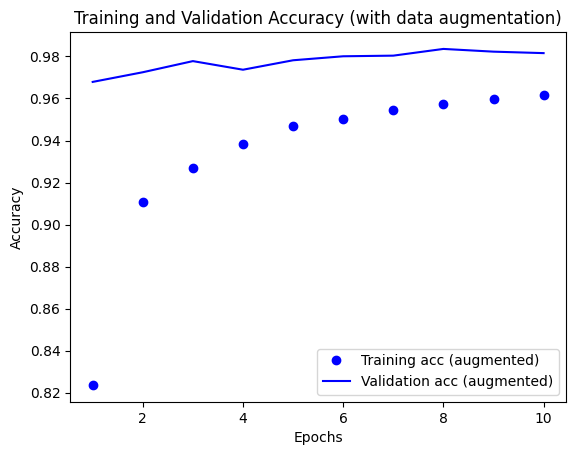

In [ ]:
# Question 2: Data Augmentation with 1000 samples per class
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# Fit the generator to your data
datagen.fit(downsampled_train_images)

# Calculate the number of steps per epoch to generate 1000 samples per class
samples_per_class = 1000
batch_size = 64
steps_per_epoch = int(samples_per_class * 10 / batch_size)  # 10 classes in MNIST

# Train the model using data augmentation
history_augmented = model.fit(
    datagen.flow(train_images, train_labels, batch_size=batch_size),
    steps_per_epoch=steps_per_epoch,
    epochs=10,
    validation_data=(test_images, test_labels)
)

# Evaluate the model on the provided test set
test_loss_augmented, test_acc_augmented = model.evaluate(test_images, test_labels)
print(f'Test accuracy (with data augmentation): {test_acc_augmented}')

# Plot training and validation accuracy
acc_augmented = history_augmented.history['accuracy']
val_acc_augmented = history_augmented.history['val_accuracy']

plt.plot(epochs, acc_augmented, 'bo', label='Training acc (augmented)')
plt.plot(epochs, val_acc_augmented, 'b', label='Validation acc (augmented)')
plt.title('Training and Validation Accuracy (with data augmentation)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
test_pred = model.predict(test_images).argmax(axis=1)
confusion_matrix(test_labels.argmax(axis=1), test_pred)

313/313 [==============================] - 3s 9ms/step


array([[ 974,    0,    2,    0,    0,    0,    3,    0,    0,    1],
       [   0, 1125,    2,    2,    3,    0,    1,    2,    0,    0],
       [   2,    4,  979,    2,    1,   29,    9,    3,    2,    1],
       [   0,    0,    1, 1003,    0,    2,    0,    3,    1,    0],
       [   0,    0,    0,    0,  978,    0,    0,    0,    2,    2],
       [   1,    0,   23,    8,    0,  852,    5,    2,    1,    0],
       [   5,    2,    6,    1,    3,    2,  937,    0,    2,    0],
       [   0,    3,    2,    0,    3,    3,    0, 1013,    1,    3],
       [   0,    0,    0,    4,    1,    1,    0,    0,  968,    0],
       [   1,    0,    0,    0,   12,    0,    0,    4,    5,  987]])

## Question 3

Epoch 1/10
16/16 [==============================] - 4s 256ms/step - loss: 0.0476 - accuracy: 0.9860 - val_loss: 0.0429 - val_accuracy: 0.9862
Epoch 2/10
16/16 [==============================] - 3s 181ms/step - loss: 0.0130 - accuracy: 0.9950 - val_loss: 0.0383 - val_accuracy: 0.9885
Epoch 3/10
16/16 [==============================] - 3s 215ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0380 - val_accuracy: 0.9885
Epoch 4/10
16/16 [==============================] - 6s 385ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0368 - val_accuracy: 0.9881
Epoch 5/10
16/16 [==============================] - 3s 215ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0362 - val_accuracy: 0.9886
Epoch 6/10
16/16 [==============================] - 3s 184ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0357 - val_accuracy: 0.9889
Epoch 7/10
16/16 [==============================] - 6s 386ms/step - loss: 8.6010e-04 - accuracy: 1.0000 - val_loss: 0.0353 - val_accuracy: 0.9891
Ep

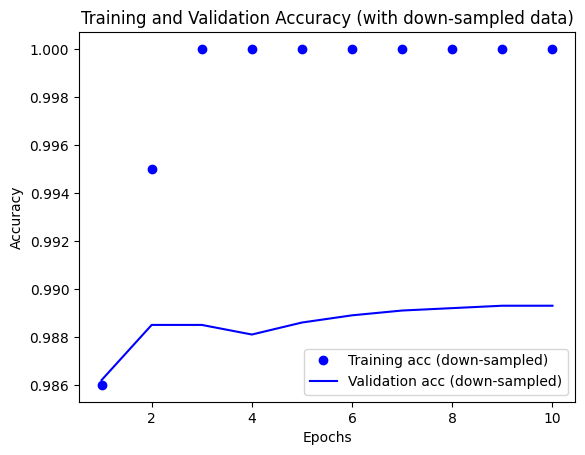

In [ ]:
# Down-sample the training data
import numpy as np

downsampled_train_images = []
downsampled_train_labels = []

for digit in range(10):
    digit_indices = np.where(np.argmax(train_labels, axis=1) == digit)[0]
    selected_indices = np.random.choice(digit_indices, size=100, replace=False)
    downsampled_train_images.extend(train_images[selected_indices])
    downsampled_train_labels.extend(train_labels[selected_indices])

downsampled_train_images = np.array(downsampled_train_images)
downsampled_train_labels = np.array(downsampled_train_labels)

# Train the model using down-sampled data
history_downsampled = model.fit(
    downsampled_train_images,
    downsampled_train_labels,
    epochs=10,
    batch_size=64,
    validation_data=(test_images, test_labels)
)

# Evaluate the model on the provided test set
test_loss_downsampled, test_acc_downsampled = model.evaluate(test_images, test_labels)
print(f'Test accuracy (with down-sampled data): {test_acc_downsampled}')

# Plot training and validation accuracy
acc_downsampled = history_downsampled.history['accuracy']
val_acc_downsampled = history_downsampled.history['val_accuracy']

plt.plot(epochs, acc_downsampled, 'bo', label='Training acc (down-sampled)')
plt.plot(epochs, val_acc_downsampled, 'b', label='Validation acc (down-sampled)')
plt.title('Training and Validation Accuracy (with down-sampled data)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
test_pred = model.predict(test_images).argmax(axis=1)
confusion_matrix(test_labels.argmax(axis=1), test_pred)

313/313 [==============================] - 3s 11ms/step


array([[ 975,    0,    2,    0,    0,    0,    2,    0,    0,    1],
       [   0, 1130,    1,    1,    0,    0,    1,    2,    0,    0],
       [   1,    2, 1018,    0,    0,    5,    2,    3,    1,    0],
       [   0,    0,    1, 1003,    0,    2,    0,    2,    2,    0],
       [   0,    1,    0,    0,  975,    0,    1,    0,    0,    5],
       [   1,    0,    6,   11,    0,  871,    3,    0,    0,    0],
       [   5,    3,    1,    0,    2,    3,  944,    0,    0,    0],
       [   0,    2,    7,    0,    2,    1,    0, 1014,    0,    2],
       [   0,    0,    1,    1,    0,    1,    1,    0,  970,    0],
       [   0,    0,    0,    0,    7,    3,    0,    2,    4,  993]])